In [ ]:
#creating LOWRES

In [3]:
import numpy as np
import numpy.polynomial.polynomial as npl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.api as smg
import pickle
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as r2

In [4]:
prtest = np.array(pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/porous_rock_images_test.pkl', 'rb')))
#testing set - images stored as 50 x 50 arrays
ftest = np.array(pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/flux_test.pkl', 'rb')))
#testing set - fluxes
ft = np.array(pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/flux_train.pkl', 'rb')))
#training set - images stored as 50 x 50 arrays
prt = np.array(pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/porous_rock_images_train.pkl', 'rb')))
#training set - fluxes
ntest, ytest, xtest = prtest.shape
nt=ntest
yt=ytest
xt=xtest
n, y, x = prt.shape

In [5]:
# normalised mean square error - normalise, then mean square error s = simulated, o = observed
def nmse(s, o):
    s = np.array(s)
    o = np.array(o)
    mean = o.mean()
    std = o.std()
    onorm = (o - mean)/std
    snorm = (s - mean)/std
    return np.dot(onorm-snorm,onorm-snorm)

# r squared
def rsq(s, o):
    s = np.array(s)
    o = np.array(o)
    mean = o.mean()
    ssres = np.dot(s - o, s - o)
    sstot = np.dot(o-mean,o-mean)
    return 1 - ssres/sstot

In [6]:
%store -r MEAN
%store -r FLIPH0
%store -r FLIPH1
%store -r CUBEH0
%store -r CUBEH1
%store -r MSR500H0
%store -r MSR500H1
%store -r MSR1000H0
%store -r MSR1000H1
%store -r MSR1500H0
%store -r MSR1500H1
%store -r MSRPROPH0
%store -r MSRPROPH1

In [108]:
# creating a LOWRES image to allow for greater no. of tests
LOWRES = list()

for m in range(n):
    prt25dummy = list()
    for a in range(5):
        for b in range(5):
            prtsquare = prt[m,10*a:10*a+10, 10*b:10*b+10]
            prt25dummy.append(prtsquare.mean())
    LOWRES.append(prt25dummy)

LOWRESTEST = list()

for m in range(ntest):
    prt25dummy = list()
    for a in range(5):
        for b in range(5):
            prtsquare = prtest[m,10*a:10*a+9, 10*b:10*b+9]
            prt25dummy.append(prtsquare.mean())
    LOWRESTEST.append(prt25dummy)

LOWRES = np.array(LOWRES)
LOWRESTEST = np.array(LOWRESTEST)
%store LOWRES
%store LOWRESTEST


Stored 'LOWRES' (ndarray)
Stored 'LOWRESTEST' (ndarray)


In [109]:
LOWRES[0]

array([0.32798001, 0.73802308, 0.60198635, 0.49886018, 0.11893333,
       0.2898974 , 0.57274709, 0.73114674, 0.49686141, 0.31055728,
       0.12672906, 0.51220261, 0.22940816, 0.21309348, 0.21527785,
       0.35317542, 0.72861159, 0.40465619, 0.21948523, 0.0824343 ,
       0.19074288, 0.41162423, 0.20893529, 0.35441381, 0.19833859])

In [110]:
LOWRESMEAN = LOWRES.mean(axis = 1)
LOWRESTESTMEAN = LOWRESTEST.mean(axis = 1)

In [111]:
LOWRESMEAN.shape
LOWRESTESTMEAN.shape

(200,)

In [112]:
LOWRESMEAN[0], MEAN[0]/2500


(0.36544486161870227, 0.3654448616187023)

In [113]:
#linear regression and test mse and rsquared
ytest = LR().fit(LOWRESMEAN.reshape(-1,1),np.array(ft)).predict(LOWRESTESTMEAN.reshape(-1,1))
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

nmse =  28.197409057597913
rsq =  0.8590129547120104


In [114]:
#linear regression and test mse and rsquared
ytest = LR().fit(LOWRES,np.array(ft)).predict(LOWRESTEST)
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

nmse =  28.109421846962363
rsq =  0.8594528907651882


In [35]:
import statsmodels.api as sm
pers1diff_sum_0plusc = sm.add_constant(pers1diff_sum_0)
mod = sm.OLS(ft, pers1diff_sum_0plusc)
res = mod.fit()
print(res.summary())
print(res.params)

In [ ]:
i=0

0.4372204616010993

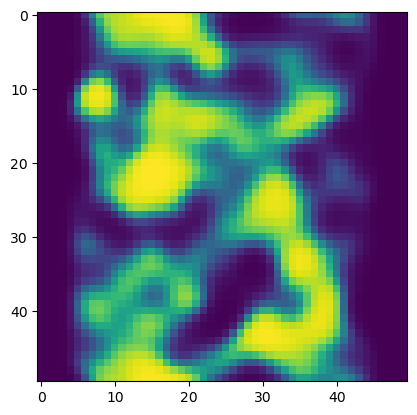

In [129]:
plt.imshow(prt[i])
i=i+1
ft[i], 


In [131]:
%store -r MSR500PTS
%store -r MSR1000PTS
%store -r MSR1500PTS
%store -r MSRPROPPTS

In [138]:
MSR1000PTS[1]

[array([18, 12, 18, 21, 10, 16,  7, 38, 35, 18, 42, 27, 16, 16, 15, 18, 11,
        18, 27, 34, 20, 25, 42, 41, 23,  7, 19, 33, 38, 27, 36, 22, 32, 18,
        24, 39,  5, 39, 28, 26, 40, 39, 40, 37,  9,  7, 38, 39, 16, 27, 13,
        28, 17, 39, 26, 30, 22, 38,  9, 13, 18,  4, 39, 39,  7, 19, 30, 31,
        39, 39, 17, 33, 40, 18, 21, 33, 36, 13, 28, 14,  6,  8, 17, 25, 22,
        41, 20, 21,  5, 27, 29, 23, 25, 16, 23, 18,  5, 41, 12, 41, 10, 32,
        17, 19, 22, 36, 30, 15, 12,  9,  9, 31, 21, 12, 15, 17, 24, 38, 40,
        28, 23, 43, 19, 24, 40, 17, 24, 29, 43, 33, 29, 16, 18, 41, 34, 30,
        33, 16,  8, 30, 30,  8, 30, 24, 41, 27,  9, 35, 39, 14, 30, 36, 44,
        19, 23, 35, 36, 10,  9, 20, 26, 25,  8, 11, 36, 10, 42, 42,  9, 34,
        39, 38, 11, 11, 41, 30, 15, 15, 25, 29, 44, 23, 13, 43, 35,  5, 37,
        24, 25,  8,  9, 41, 19, 31, 16, 43, 27, 11,  7, 17, 10, 37, 31, 13,
        41, 41, 17, 18, 29, 12, 13, 39, 34, 12,  7, 27, 41, 11, 21, 17, 10,
        28, 

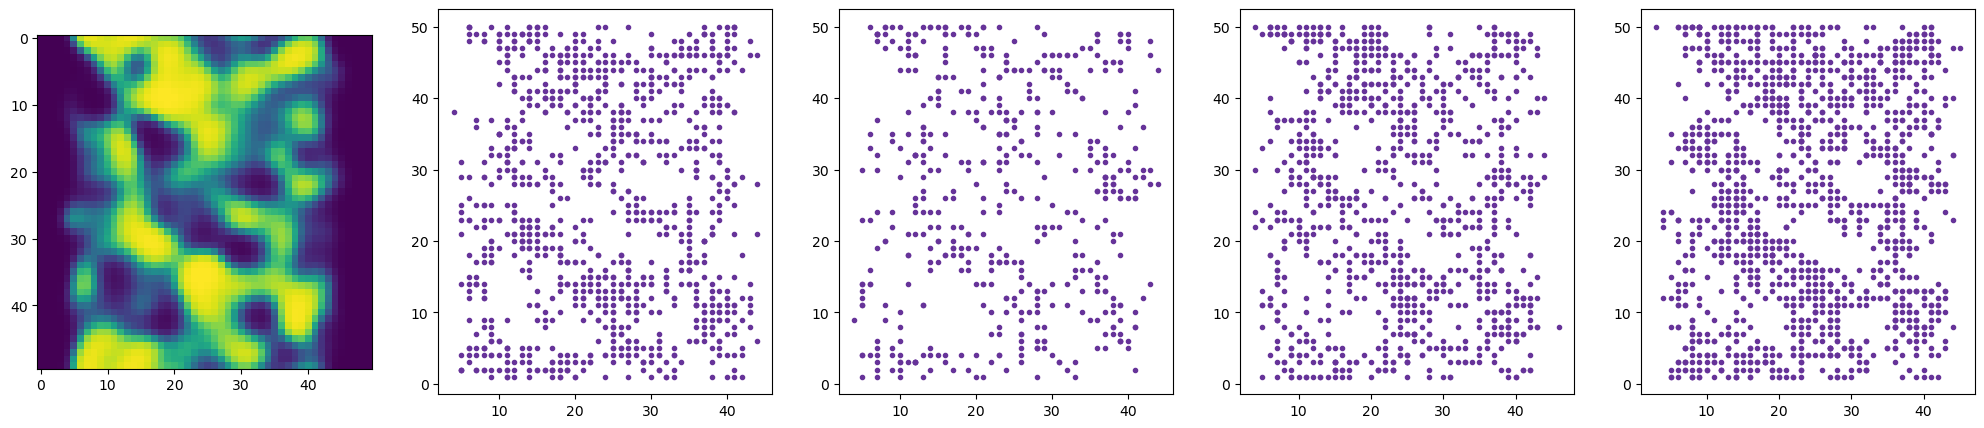

In [139]:
import matplotlib.pyplot as plt
inum = 19
train = prt[inum]
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(25,5), gridspec_kw={'width_ratios': [1,1,1,1,1]})
ax1.imshow(train)
ax2.scatter(MSRPROPPTS[0][inum],50-MSRPROPPTS[1][inum],marker = '.', color = 'rebeccapurple')
ax3.scatter(MSR500PTS[0][inum],50-MSR500PTS[1][inum],marker = '.', color = 'rebeccapurple')
ax4.scatter(MSR1000PTS[0][inum],50-MSR1000PTS[1][inum],marker = '.', color = 'rebeccapurple')
ax5.scatter(MSR1500PTS[0][inum],50-MSR1500PTS[1][inum],marker = '.', color = 'rebeccapurple')

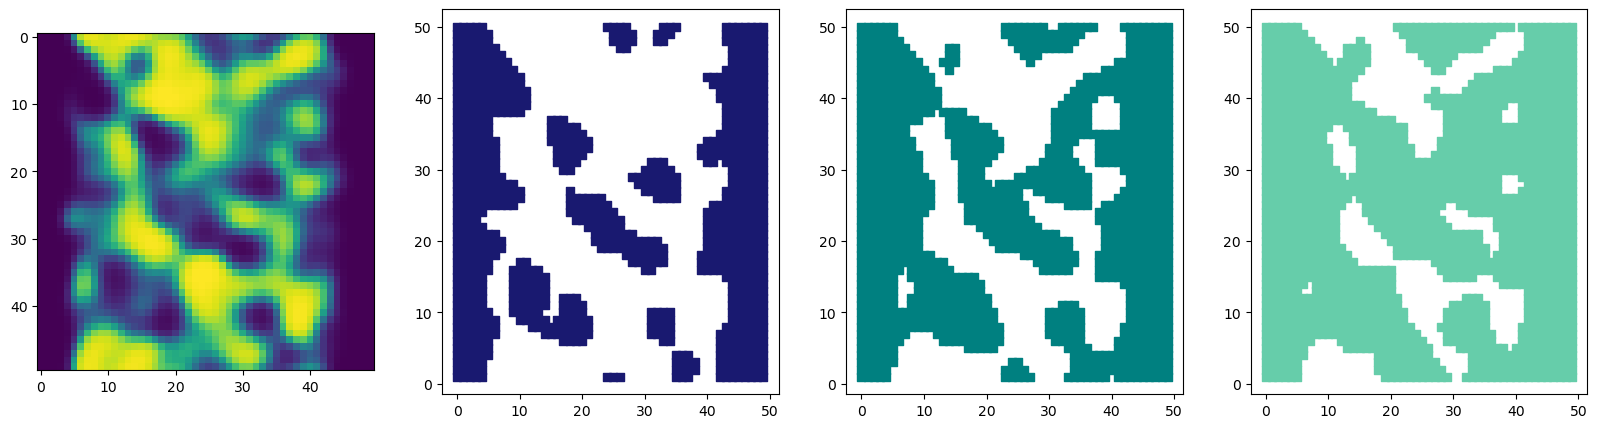

In [165]:
# cubes graph
CUBEPTS25 = np.where(prt[inum] < 0.25)
CUBEPTS50 = np.where(prt[inum] < 0.5)
CUBEPTS75 = np.where(prt[inum] < 0.75)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,5), gridspec_kw={'width_ratios': [1,1,1,1]})
ax1.imshow(train)
ax2.scatter(CUBEPTS25[1],50-CUBEPTS25[0],marker = 's', color = 'midnightblue')
ax3.scatter(CUBEPTS50[1],50-CUBEPTS50[0],marker = 's', color = 'teal')
ax4.scatter(CUBEPTS75[1],50-CUBEPTS75[0],marker = 's', color = 'mediumaquamarine')

In [153]:
aximshow(CUBEPTS25)

NameError: name 'imshow' is not defined